This lab explores the dog licensing data set:  [https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp/data](https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp/data)

Filter this data set to only contain entries with the license expiring after today (Aug. 29) before downloading it as a CSV file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Read the CSV file into a dataframe called `dogs`, and display the dataframe to make sure it was loaded correctly.

In [4]:
dogs = pd.read_csv("NYC_Dog_Licensing_Dataset.csv")

Two of the columns are dates, so make them into `datetime` objects.

In [8]:
dogs["LicenseIssuedDate"] = pd.to_datetime(dogs["LicenseIssuedDate"])
dogs["LicenseExpiredDate"] = pd.to_datetime(dogs["LicenseExpiredDate"])

In [10]:
dogs.head()


,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,15470,FOTCH,M,2007,Labrador Retriever Crossbreed,NaN,10464,2015-05-31,2019-08-30,2016
1,55224,SANGRIA,F,2010,Italian Greyhound,NaN,10037,2016-04-10,2019-08-30,2016
2,75708,CARLUSHA,M,2003,Shih Tzu,NaN,11235,2016-07-05,2019-08-30,2016
3,76211,RUFUS,M,2002,Cocker Spaniel,NaN,10024,2016-07-07,2019-08-30,2016
4,89066,CHEWIE,M,2009,Golden Retriever,NaN,10025,2016-08-30,2019-08-30,2016


Get an over-view of the dataset by calling the `describe()` function.

In [11]:
dogs.describe()

,RowNumber,AnimalBirthMonth,Borough,ZipCode,Extract Year
count,56120.000000,56120.000000,0.0,56120.000000,56120.000000
mean,69507.152994,2012.165752,NaN,10655.356700,2017.634979
std,40045.130293,20.427198,NaN,893.995844,0.636891
min,1.000000,1.000000,NaN,6403.000000,2016.000000
25%,31748.250000,2010.000000,NaN,10026.000000,2017.000000
50%,86828.500000,2013.000000,NaN,10462.000000,2018.000000
75%,104383.250000,2015.000000,NaN,11223.000000,2018.000000
max,117371.000000,2018.000000,NaN,98363.000000,2018.000000


1.  Are the summary statistics (mean, standard deviation, min, etc.) meaningful for all of these columns?
2.  Are we missing any data?

Answers:
1. No.  The only column they might be meaningful for is `Extract Year`.
2. Yes, notice we have no borough information, despite it being a column.  Also, some of the columns are missing!

To display columns with non-numeric data, we need to use the following command.

In [12]:
dogs.describe(include = ["O"])

,AnimalName,AnimalGender,BreedName
count,56047,56119,56120
unique,8977,2,305
top,BELLA,M,Unknown
freq,636,30256,5833


What's the most common dog name?

To visualize the distribution of a qualitative or categorica column, we will make a bar chart (as in MAT 128).  Let's do this for the `AnimalGender` column.

First get the value counts.

In [13]:
gender_counts = dogs['AnimalGender'].value_counts()
gender_counts

M    30256
F    25863
Name: AnimalGender, dtype: int64

Are there roughly 50% male and female dogs?

Next we plot the counts:

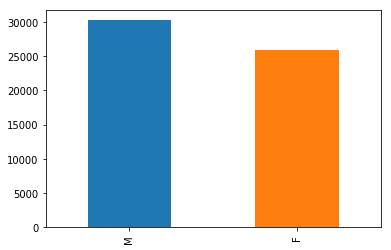

In [14]:
gender_counts.plot.bar()

Add a title and axis labels.  Remember to repeat your original plot.

Text(0, 0.5, 'Number of dogs by gender')

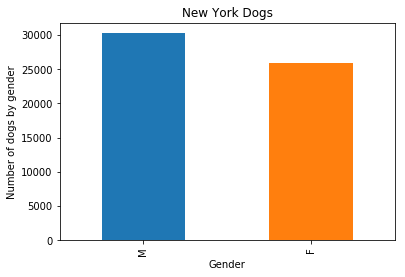

In [20]:
gender_counts.plot.bar()
plt.title("New York Dogs")
plt.xlabel("Gender")
plt.ylabel("Number of dogs by gender")

Let's plot the distribution of another categorial column, `BreedName`.

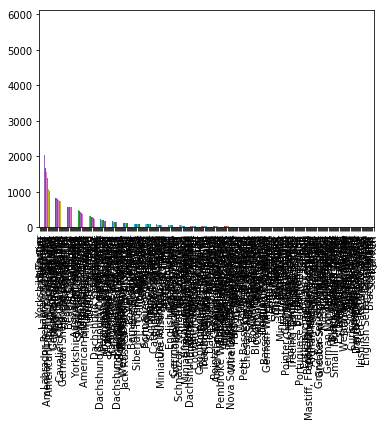

In [26]:
breed_counts = dogs['BreedName'].value_counts()
breed_counts.plot.bar()


Is this plot as readable as the gender one?

We can fix this by just plotting the top 10 breeds using filtering.  First, look at the counts to see what the cut-off should be.

It looks like 1000 would be a good cut-off.  We can do the filter one of two ways:

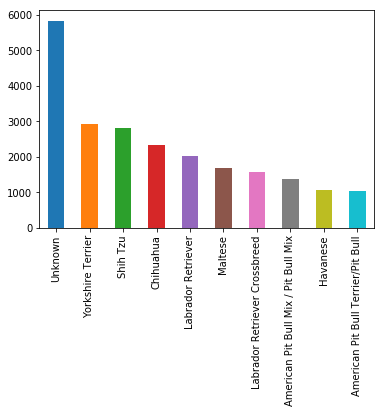

In [25]:
top_filter = breed_counts >=1000
breed_counts[top_filter].plot.bar()

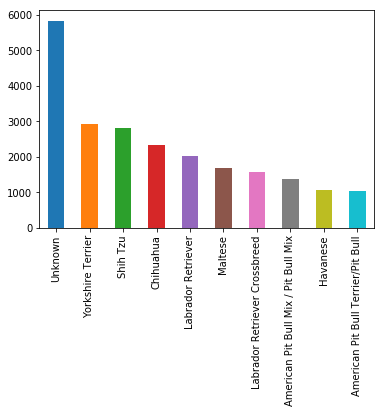

In [27]:
breed_counts[breed_counts >= 1000].plot.bar()

What's the most popular breed of dog?

In Lab 1, we only filtered by a single criteria, but we can filter by multiple criteria using `&` (and) and `|` (or).  For example, if we wanted to count the number of dog licenses issues in August to a Chihuahua:

In [28]:
aug_chihuahua_filter = (dogs["BreedName"] == "Chihuahua") & (dogs["LicenseIssuedDate"].dt.month == 8)
len(dogs[aug_chihuahua_filter])

228

Or if we wanted to count the number of dogs named BELLA or dogs whose license expires in 2020:

In [29]:
bella_2020_filter = (dogs["AnimalName"] == "BELLA") | (dogs["LicenseExpiredDate"].dt.year == 2020)
len(dogs[bella_2020_filter])

15505

With a partner or by yourself, answer the following questions:

1.  How many dogs are registered in the Lehman zip code (10468)? 

In [49]:
zipcode_filter = (dogs['ZipCode'] == 10468)
len(dogs[zipcode_filter])

129

2.  Plot a bar chart of the number of dog licenses in the top 10 zip codes?  Which zip code has the most dog licenses and where is it located (type a zip code into Google maps to see the area)?

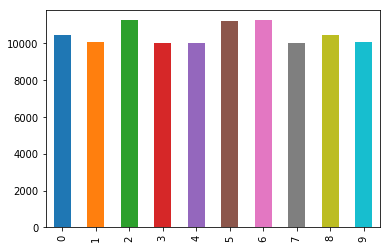

In [54]:
dogs["ZipCode"].head(10).plot.bar()

3.  How many female Labrador Retreivers are licensed?

In [60]:
labrador_filter = dogs["BreedName"] == 'Labrador Retriever'
len(dogs[labrador_filter])

2025

4.  How many licenses are due to expired by the end of September?

In [62]:
sept_labrador_filter = labrador_filter = dogs["BreedName"] == 'Labrador Retriever' & (dogs["LicenseIssuedDate"].dt.month == 9)
len(dogs[sept_labrador_filter])


TypeError: cannot compare a dtyped [bool] array with a scalar of type [bool]

5. Ask and answer your own question(s) about this dataset.

Challenge question:  Can you find the oldest dog in the dataset?